## DCGAN:
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [1]:
import torch
import numpy as np
from model import init_weights, Generator, Discriminator

z_dim = 100
netG = Generator(z_dim)
netG.load_state_dict(torch.load('./result/100_netG.pth'))


<All keys matched successfully>

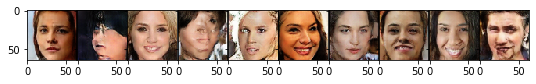

In [2]:
fixed_noise = torch.randn(10, z_dim)

gen_imgs = netG(fixed_noise)/2.+.5

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

## origin images
fig = plt.figure(figsize=(9., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 10),  # creates 2x2 grid of axes
                 axes_pad=0.01,  # pad between axes in inch.
                 )
for ax, im in zip(grid, gen_imgs.detach().cpu().numpy()):
    # Iterating over the grid returns the Axes.
    im = np.moveaxis(im,0,-1)
    ax.imshow(im)
plt.show()

In [3]:
gen_imgs.max()

tensor(0.9994, grad_fn=<MaxBackward1>)

## 32 random generate

In [4]:
np.random.seed(87)
latent = torch.tensor(np.random.normal(size=(32,z_dim))).float()

out_imgs = netG(latent)/2.+.5
out_imgs.shape

torch.Size([32, 3, 64, 64])

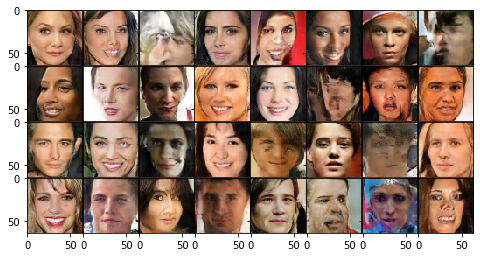

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

fig = plt.figure(figsize=(8., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 8),  # creates 2x2 grid of axes
                 axes_pad=0.01,  # pad between axes in inch.
                 )

for ax, im in zip(grid, out_imgs.detach().cpu().numpy()):
    # Iterating over the grid returns the Axes.
    im = np.moveaxis(im,0,-1)
    ax.imshow(im)

plt.show()